In [152]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16


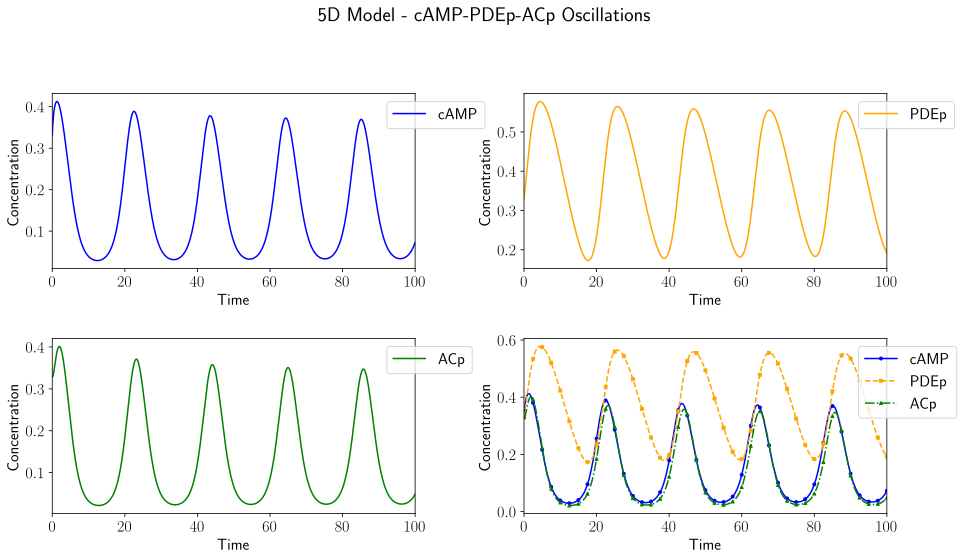

In [153]:
def cAMP_PDEp_ACp(t, x):
    cAMP = x[0]
    PDE = x[1]
    PDEp = x[2]
    AC = x[3]
    ACp = x[4]


    dAC  = r4*Et *ACp/(K4+ACp) - r3*AC*cAMP /(K3+AC )
    dACp  = r3*AC*cAMP /(K3+AC ) - r4*Et *ACp/(K4+ACp)

    dPDE  = r2*Dt *PDEp/(K2+PDEp) - r1*PDE*cAMP /(K1+PDE )
    dPDEp = r1*PDE*cAMP /(K1+PDE ) - r2*Dt *PDEp/(K2+PDEp)

    dcAMP = (k0+k1*ACp) - (k3+k4*PDEp)*cAMP

    return [dcAMP, dPDE, dPDEp, dAC, dACp]

#frq = 1 # Adjusting oscillation frequency
k0, k1, k3, k4 = 0.0, 2.85, 0.69, 4.45
r1, r2, r3, r4 = 0.52, 0.47, 2, 10
K1, K2, K3, K4 = 0.1, 0.1, 0.001, 1.0
Dt, Et =  0.15, 0.28
#Dt = 0.15
#q1, q2 = 0*frq*0.002, 0*frq*0.01
#K0 = 5



init_conditions = {'cAMP0': 0.33, 'PDE0': 0.33, 'PDEp0': 0.33, 'AC0': 0.33, 'ACp0': 0.33}
x0 = list(init_conditions.values())

solver = solve_ivp(cAMP_PDEp_ACp, [0, 1000], x0, t_eval=np.linspace(0, 500, 10000), method='RK45', atol=1e-8, rtol=1e-8)

cAMP, PDE, PDEp, AC, ACp = solver.y
# Create a figure with multiple axes

fig = plt.figure(figsize=(16, 12))
fig.suptitle("5D Model - cAMP-PDEp-ACp Oscillations", fontsize=20)
fig.xlim = (0, 100)

gs = GridSpec(3, 2, figure=fig)
legend_position = {'bbox_to_anchor': (0.9, 1), 'loc': 'upper left'}


# First row
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(solver.t, cAMP, label='cAMP', color='blue')
ax0.set_xlabel('Time')
ax0.set_ylabel('Concentration')
ax0.set_xlim(0, 100)
ax0.legend(**legend_position, fontsize=16)

ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(solver.t, PDEp, label='PDEp', color='orange')
ax1.set_xlabel('Time')
ax1.set_ylabel('Concentration')
ax1.set_xlim(0, 100)
ax1.legend(**legend_position, fontsize=16)

# Second row
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(solver.t, ACp, label='ACp', color='green')
ax2.set_xlabel('Time')
ax2.set_ylabel('Concentration')
ax2.set_xlim(0, 100)
ax2.legend(**legend_position, fontsize=16)

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(solver.t, cAMP, label='cAMP', color='blue', linestyle='-', marker='o', markersize=3, markevery=50)
ax3.plot(solver.t, PDEp, label='PDEp', color='orange', linestyle='--', marker='s', markersize=3, markevery=50)
ax3.plot(solver.t, ACp, label='ACp', color='green', linestyle='-.', marker='^', markersize=3, markevery=50)
ax3.set_xlabel('Time')
ax3.set_ylabel('Concentration')
ax3.set_xlim(0, 100)
ax3.legend(**legend_position, fontsize=16)

# Third row (centered 3D plot)
#ax4 = fig.add_subplot(gs[2, :], projection='3d')
#ax4.plot(cAMP, PDEp, ACp, label='cAMP-PDEp-ACp', color='green')
#ax4.set_xlabel('cAMP')
#ax4.set_ylabel('PDEp')
#ax4.set_zlabel('ACp')
#ax4.legend(**legend_position, fontsize=16)

# Adjust the spacing between the axes
fig.subplots_adjust(wspace=0.3, hspace=0.4, right=0.85)
fig.savefig('cAMP_PDEp_ACp.png', dpi=300, bbox_inches='tight')
# Show the plots

# Show the plots
plt.show()

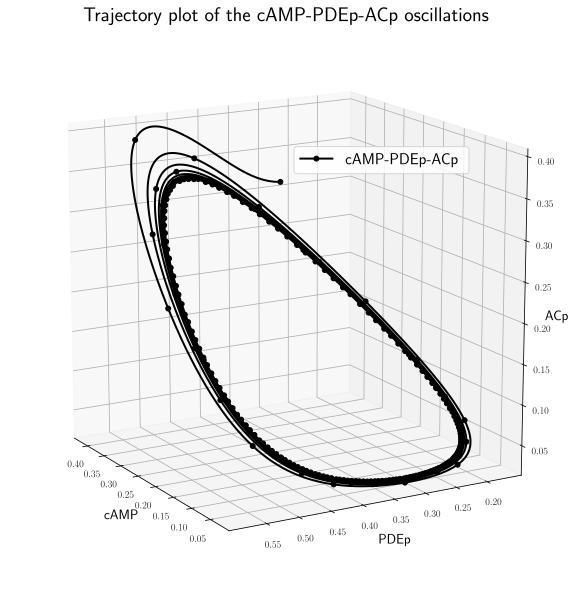

In [151]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for the 3D plot
fig_3d = plt.figure(figsize=(10, 11))

# Add a 3D subplot
ax_3d = fig_3d.add_subplot(111, projection='3d')

# Plot the 3D data
ax_3d.plot(cAMP, PDEp, ACp, label='cAMP-PDEp-ACp', color='black', linewidth=2, marker='o', markersize=5, markevery=50)
ax_3d.title.set_text('Trajectory plot of the cAMP-PDEp-ACp oscillations')
# Set the axis labels
ax_3d.set_xlabel('cAMP', fontsize=14, labelpad=5)
ax_3d.set_ylabel('PDEp', fontsize=14, labelpad=5)
ax_3d.set_zlabel('ACp', fontsize=14, labelpad=-1)

# Set the legend
legend_position = {'bbox_to_anchor': (0.5, 0.8), 'loc': 'upper left'}
ax_3d.legend(**legend_position, fontsize=16)

# Customize the appearance of the 3D plot
ax_3d.view_init(15,150)  # Adjust the view angle
ax_3d.grid(True)  # Show gridlines
ax_3d.set_box_aspect([1, 1, 1])  # Set the aspect ratio of the axes to be equal
plt.savefig('3DcAMP_PDEp_ACp.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()
